CatBoost installation to build CatBoost model

In [1]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.2 MB/s eta 0:00:00


Importing required libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import iqr, zscore
import xgboost as xgb
import lightgbm as lgbm
from catboost import CatBoostRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

Importing and reading the csv house price dataset

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Week 11_Graded Mini Project_Dataset_houseprice.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Checking the dataset size

In [4]:
df.shape

(1460, 81)

Gathering some info about the dataset such as numerical vs categorical features

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Drop duplicates if any

In [7]:
df.drop_duplicates(inplace=True)

Check null count

In [8]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


# ***1.1 Handling Missing Values***

### For numerical data

Dropping column "Id" and columns with more than 40% null values

In [9]:
df = df.drop('Id', axis=1)

for column in df.columns:
  count = df[column].isnull().sum()
  if count > (len(df)/2.5):
    df = df.drop(column, axis=1)
    print("Dropped column", column, "with null count", count)

Dropped column Alley with null count 1369
Dropped column MasVnrType with null count 872
Dropped column FireplaceQu with null count 690
Dropped column PoolQC with null count 1453
Dropped column Fence with null count 1179
Dropped column MiscFeature with null count 1406


Check null count for the numerical features

In [10]:
for column in df.select_dtypes(include=np.number).columns:
  count = df[column].isnull().sum()
  if count > 0:
    print("Column", column, "has", count, "null values")

Column LotFrontage has 259 null values
Column MasVnrArea has 8 null values
Column GarageYrBlt has 81 null values


Plotting histograph to visualize numerical features with missing values

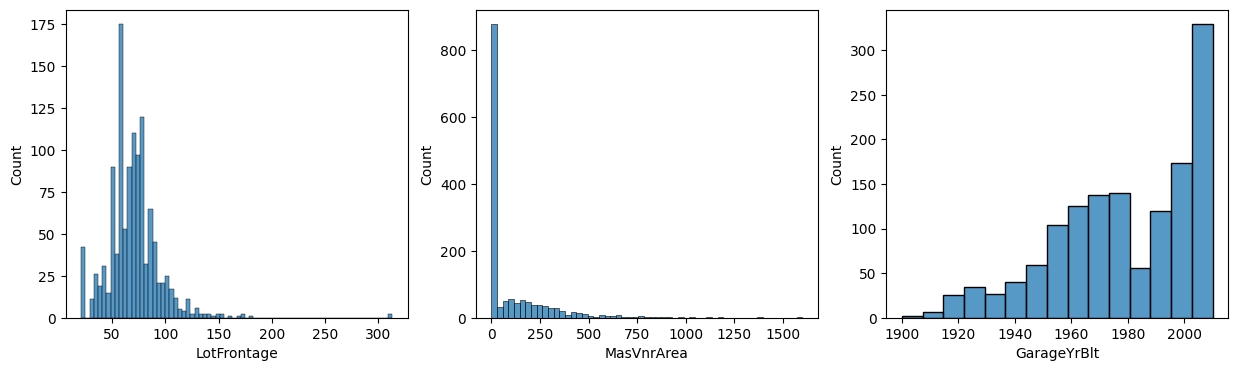

In [11]:

plt.figure(figsize=(15,4))
plt.subplot(1, 3, 1)
sns.histplot(df['LotFrontage'])
plt.subplot(1, 3, 2)
sns.histplot(df['MasVnrArea'])
plt.subplot(1, 3, 3)
sns.histplot(df['GarageYrBlt'])
plt.show()

In [12]:
print("LotFrontage Mean", df['LotFrontage'].mean())
print("LotFrontage Median", df['LotFrontage'].median())
print("LotFrontage Mode", df['LotFrontage'].mode(), "\n")
print("MasVnrArea Mean", df['MasVnrArea'].mean())
print("MasVnrArea Median", df['MasVnrArea'].median())
print("MasVnrArea Mode", df['MasVnrArea'].mode(), "\n")
print("GarageYrBlt mean", df['GarageYrBlt'].mean())
print("GarageYrBlt median", df['GarageYrBlt'].median())
print("GarageYrBlt mode", df['GarageYrBlt'].mode())

LotFrontage Mean 70.04995836802665
LotFrontage Median 69.0
LotFrontage Mode 0    60.0
Name: LotFrontage, dtype: float64 

MasVnrArea Mean 103.68526170798899
MasVnrArea Median 0.0
MasVnrArea Mode 0    0.0
Name: MasVnrArea, dtype: float64 

GarageYrBlt mean 1978.5061638868744
GarageYrBlt median 1980.0
GarageYrBlt mode 0    2005.0
Name: GarageYrBlt, dtype: float64


**Perform Imputation**

*Replacing missing values for numerical features with median values.*

In [13]:
df = df.fillna(df[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].median())

## For Categorical Data

Creating list of categorical features

In [14]:
categorical_features = []
for column in df.select_dtypes(include='object').columns:
  categorical_features.append(column)
print(categorical_features)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


List categorical features with null values


In [15]:
for column in categorical_features:
  count = df[column].isnull().sum()
  if count > 0:
    print("Column", column, "has", count, "null values")

Column BsmtQual has 37 null values
Column BsmtCond has 37 null values
Column BsmtExposure has 38 null values
Column BsmtFinType1 has 37 null values
Column BsmtFinType2 has 38 null values
Column Electrical has 1 null values
Column GarageType has 81 null values
Column GarageFinish has 81 null values
Column GarageQual has 81 null values
Column GarageCond has 81 null values


**Perform Imputation**

Replacing null values with mode value for categorical features

In [16]:
for column in categorical_features:
  count = df[column].isnull().sum()
  if count > 0:
    df[column] = df[column].fillna(df[column].mode()[0])

# **1.2 Converting Categorical Variables**

*Visualize categorical features to decide if the feature needs one hot encoding or label encoding*

In [17]:
df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

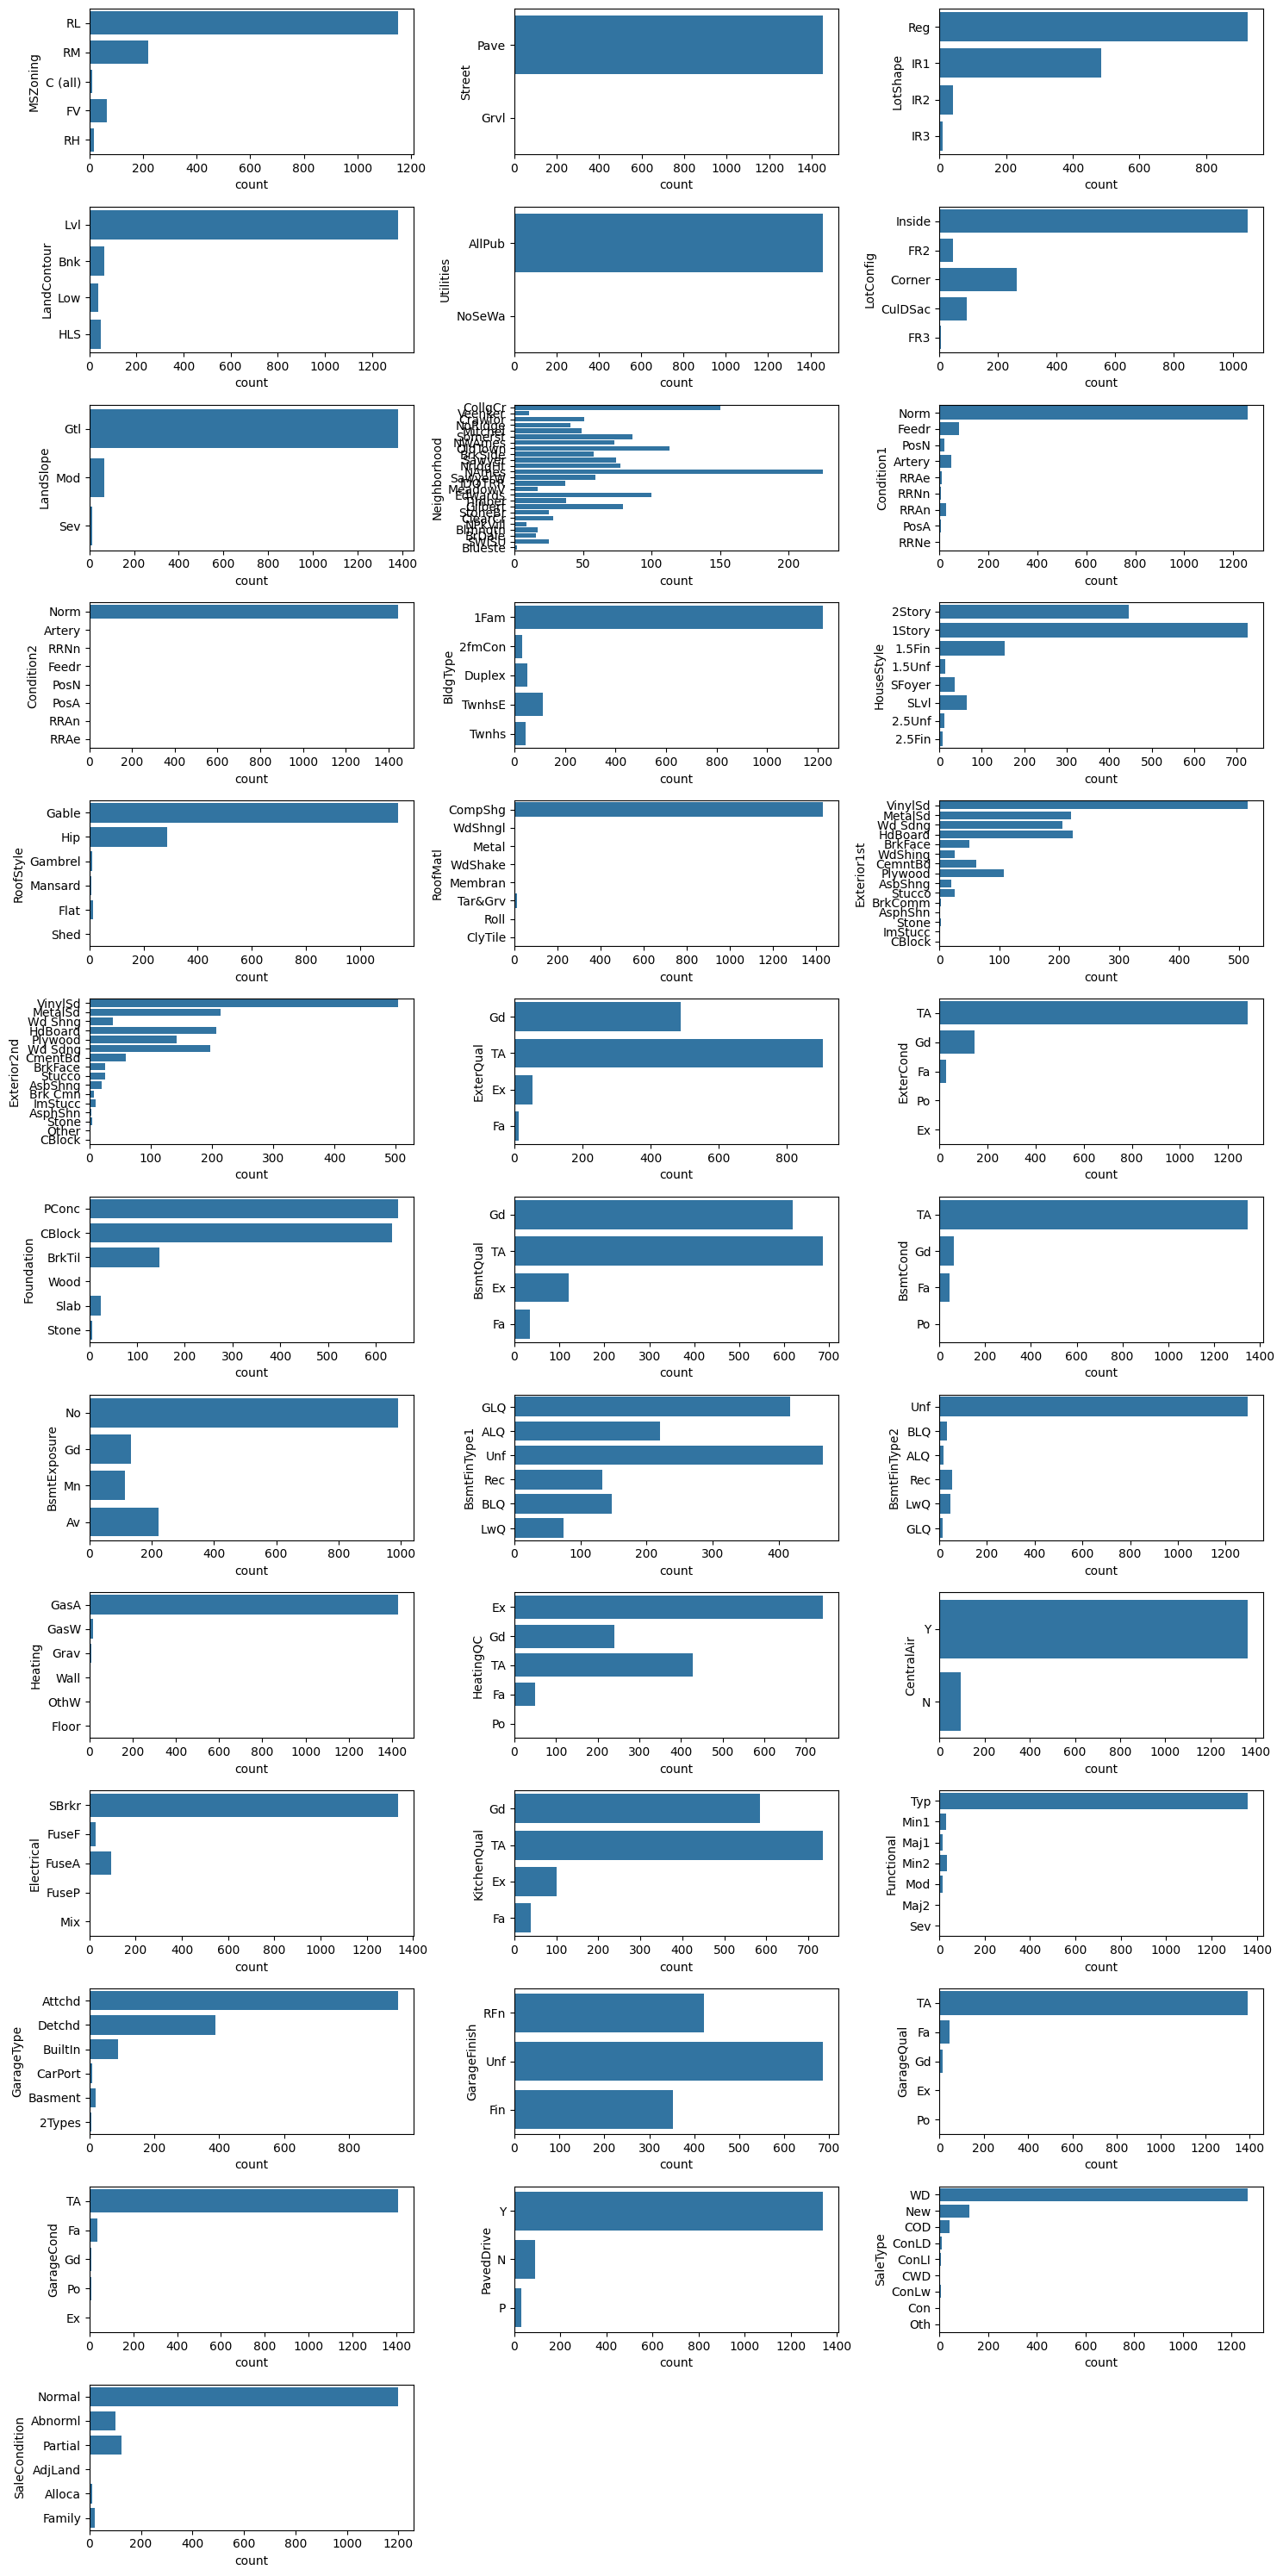

In [18]:
plt.figure(figsize=(15, 30))
for i, column in enumerate(df.select_dtypes(include='object').columns, 1):
  plt.subplot(13, 3, i)
  sns.countplot(df[column])
plt.tight_layout()
plt.show()

Creating separate variables for nominal/binary and ordinal features to apply encoding technique accordingly

*Initially I created two variables: ordinal_cat and nominal_cat. However, I ended up getting negative correlation for Quality related features which didn't looked right. After that I manually did label encoding for quality related features that were on same scale.*

In [19]:
ordinal_cat = ['LotShape', 'LandContour', 'Utilities', 'LandSlope', 'Functional', 'BsmtExposure']
quality_features = ['ExterQual', 'ExterCond', 'KitchenQual', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'GarageQual', 'GarageCond']
nominal_cat = ['MSZoning', 'Street', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'BldgType', 'RoofStyle', 'RoofMatl' , 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'PavedDrive', 'SaleCondition', 'SaleType', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish']

Perform manual label encoding for ordinal quality features having same scale

In [20]:
quality_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
for i, column in enumerate(quality_features, 1):
  df[column] = df[column].map(quality_map)

Perform label encoding for remaning ordinal features

In [21]:
le = LabelEncoder()
for column in ordinal_cat:
  df[column] = le.fit_transform(df[column])

Perform one hot encoding for nominal and binary features

In [22]:
for column in nominal_cat:
  df = pd.get_dummies(df, columns=[column], dtype=int)

*This is how the dataset looks after completing imputation and encoding*

In [23]:
df.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,BsmtFinType2_Unf,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,60,65.0,8450,3,3,0,0,7,5,2003,...,1,0,1,0,0,0,0,0,1,0
1,20,80.0,9600,3,3,0,0,6,8,1976,...,1,0,1,0,0,0,0,0,1,0
2,60,68.0,11250,0,3,0,0,7,5,2001,...,1,0,1,0,0,0,0,0,1,0
3,70,60.0,9550,0,3,0,0,7,5,1915,...,1,0,0,0,0,0,1,0,0,1
4,60,84.0,14260,0,3,0,0,8,5,2000,...,1,0,1,0,0,0,0,0,1,0


**Now since all the features have been converted to numerical. Let's check their correlation score.**

*Checking correlation of numerical features with SalePrice. Looking for correlation between < -0.5 or > 0.5.*

In [24]:
corr_features = []

for column in df.select_dtypes(include=np.number).columns:
  score = df['SalePrice'].corr(df[column])
  if score > 0.5:
    print("Positive: ", column, score)
    corr_features.append(column)
  elif score < -0.5:
    print("Negative: ", column, score)
    corr_features.append(column)

Positive:  OverallQual 0.7909816005838044
Positive:  YearBuilt 0.5228973328794969
Positive:  YearRemodAdd 0.5071009671113864
Positive:  ExterQual 0.6826392416562594
Positive:  BsmtQual 0.6501380175698004
Positive:  TotalBsmtSF 0.6135805515591956
Positive:  1stFlrSF 0.6058521846919147
Positive:  GrLivArea 0.7086244776126523
Positive:  FullBath 0.5606637627484449
Positive:  KitchenQual 0.6595997207286639
Positive:  TotRmsAbvGrd 0.5337231555820282
Positive:  GarageCars 0.6404091972583529
Positive:  GarageArea 0.6234314389183618
Positive:  SalePrice 1.0
Negative:  GarageFinish_Unf -0.5139062609657634


Let's check the correlation chart as well before dropping some of the features

<Axes: >

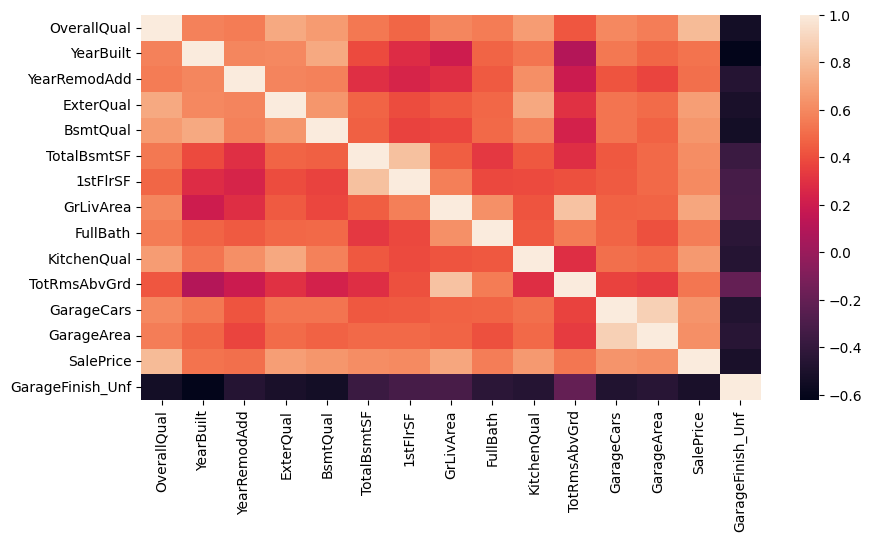

In [25]:
plt.subplots(figsize=(10, 5))
sns.heatmap(df[corr_features].corr())

There is similar correlation between some similar features hence dropping one of them.

1.   YearBuilt and **YearRemodAdd**
2.   TotalBsmtSF and **1stFlrSF**
3.   GarageCars and **GarageArea**
4.   GrLivArea and **TotRmsAbvGrd**
5.   ExterQual and **BsmtQual**

In [26]:
corr_features_df = df[corr_features].drop(['YearRemodAdd', '1stFlrSF', 'GarageArea', 'TotRmsAbvGrd'], axis=1)

Let's see how dataset looks like after dropping the features

In [27]:
corr_features_df.head()

,OverallQual,YearBuilt,ExterQual,BsmtQual,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,GarageCars,SalePrice,GarageFinish_Unf
0,7,2003,4,4,856,1710,2,4,2,208500,0
1,6,1976,3,4,1262,1262,2,3,2,181500,0
2,7,2001,4,4,920,1786,2,4,2,223500,0
3,7,1915,3,3,756,1717,1,4,3,140000,1
4,8,2000,4,4,1145,2198,2,4,3,250000,0


***1.3 Normalising Numerical Features: Normalise numerical features to ensure they are on a comparable scale.***

Plotting histograph before normalization

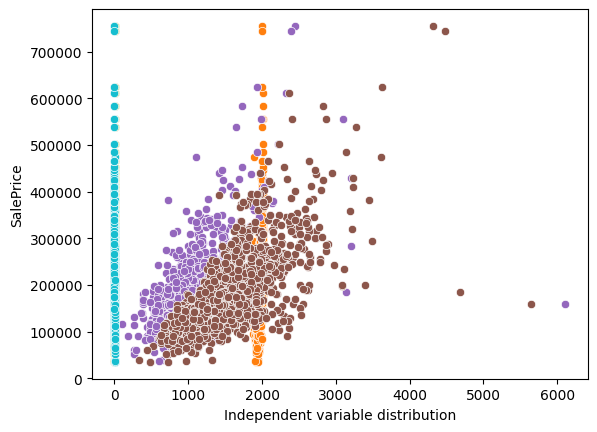

In [28]:
for column in corr_features_df.columns:
  if column != 'SalePrice':
    sns.scatterplot(data=corr_features_df, x=column, y='SalePrice')
    plt.xlabel("Independent variable distribution")

*Above we can see that values are distributed at different scale*

Applying min max scaling to normalize the scale between 0 and 1



In [29]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(corr_features_df)
df_scaled = pd.DataFrame(df_scaled, columns=corr_features_df.columns)

Plotting histograph after normalization

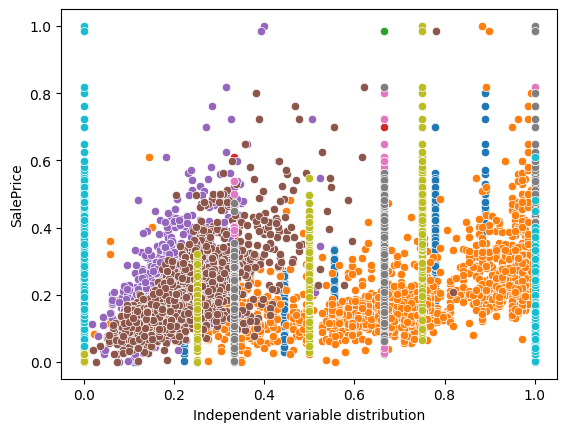

In [30]:
for column in df_scaled.columns:
  if column != 'SalePrice':
    sns.scatterplot(data=df_scaled, x=column, y='SalePrice')
    plt.xlabel("Independent variable distribution")

Removing null values in Sale price and GrLivArea after normalization

In [31]:
non_null_features = ['SalePrice', 'GrLivArea']

for column in non_null_features:
  null_row = df_scaled.loc[df_scaled[column] == 0]
  if not null_row.empty:
    df_scaled = df_scaled.drop(null_row.index, axis=0)
    print("Removed row", null_row, "for column:", column)

Removed row      OverallQual  YearBuilt  ExterQual  BsmtQual  TotalBsmtSF  GrLivArea  \
495     0.333333   0.347826   0.333333  0.333333      0.11784    0.07272   

     FullBath  KitchenQual  GarageCars  SalePrice  GarageFinish_Unf  
495  0.333333     0.333333         0.0        0.0               1.0   for column: SalePrice
Removed row      OverallQual  YearBuilt  ExterQual  BsmtQual  TotalBsmtSF  GrLivArea  \
533          0.0   0.536232        0.0  0.333333          0.0        0.0   

     FullBath  KitchenQual  GarageCars  SalePrice  GarageFinish_Unf  
533  0.333333          0.0         0.0    0.00611               1.0   for column: GrLivArea


***1.4	Outlier Detection: Identify and handle outliers in the dataset.***

Let's plot boxplot to look at the outliers

<Axes: >

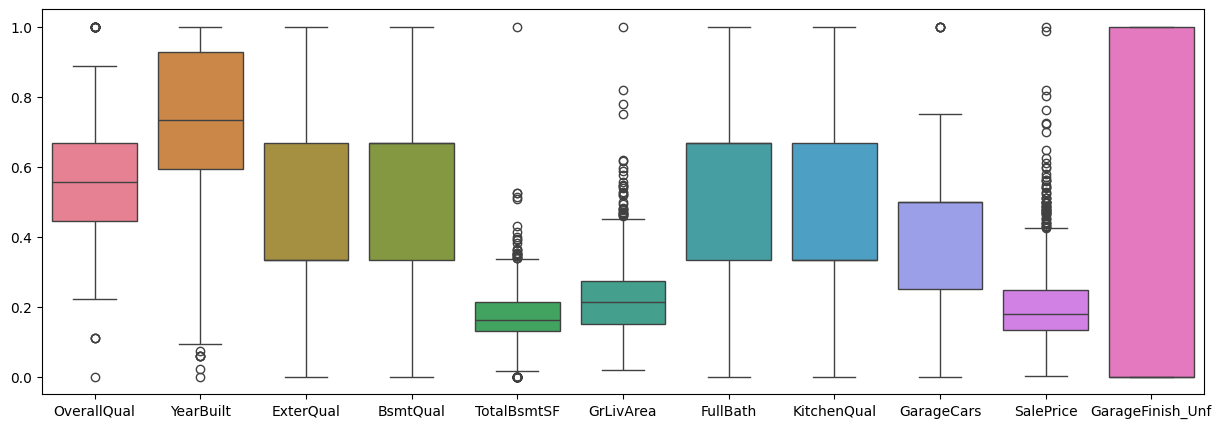

In [32]:
plt.figure(figsize=(15,5))
sns.boxplot(df_scaled)

**There are outliers in TotalBsmtSF, GrLivArea and SalePrice**

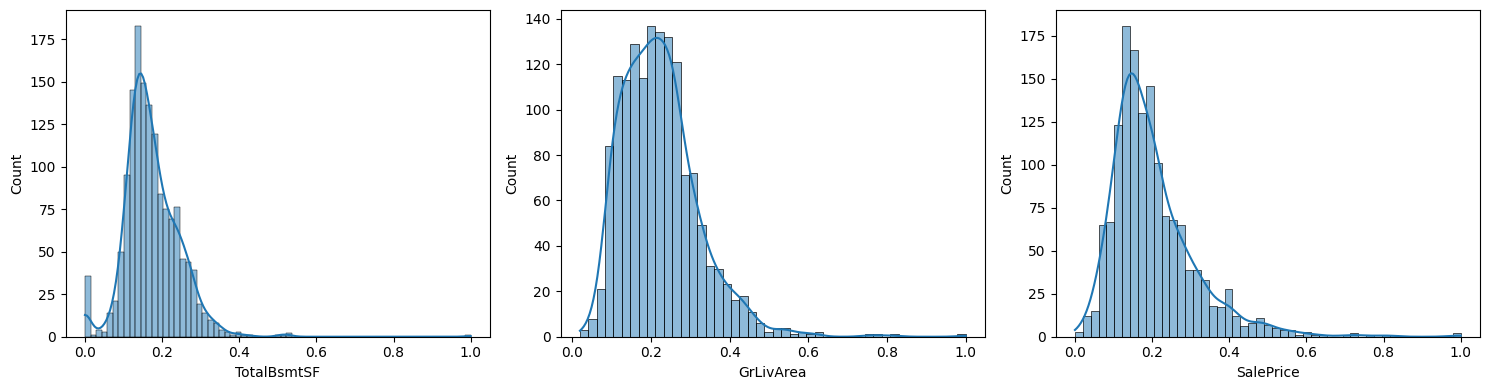

In [33]:
outliers = ['TotalBsmtSF', 'GrLivArea', 'SalePrice']
plt.figure(figsize=(15, 4))
for i, column in enumerate(outliers, 1):
  plt.subplot(1, 3, i)
  sns.histplot(df_scaled[column], kde=True)
plt.tight_layout()
plt.show()

*Above we can see right tail (Positive skewness) for these 3 features.*

Let's check the skewness score for all the features that are positivley for negatively skewed

In [34]:
for i, column in enumerate(df_scaled.columns, 1):
  skew_score = df_scaled[column].skew()
  if skew_score > 0.5:
    print("Positive skew: ", column, skew_score)
  if skew_score < -0.5:
    print("Negative skew: ", column, skew_score)

Negative skew:  YearBuilt -0.6167626712522334
Positive skew:  ExterQual 0.8345789217700385
Positive skew:  TotalBsmtSF 1.5367244392561492
Positive skew:  GrLivArea 1.3785057743747198
Positive skew:  SalePrice 1.8950889738919652


Let's apply log transformation for these features

In [35]:
sqrt_transformation = ['GrLivArea', 'SalePrice']
for column in sqrt_transformation:
  skew_score = df_scaled[column].skew()
  df_scaled[column] = np.sqrt(df_scaled[column])

log_transformation = ['TotalBsmtSF', 'ExterQual']
for column in log_transformation:
  skew_score = df_scaled[column].skew()
  df_scaled[column] = np.log1p(df_scaled[column])

In [36]:
print("Skewness after transformation")
for i, column in enumerate(df_scaled.columns, 1):
  skew_score = df_scaled[column].skew()
  if skew_score > 0.5:
    print(column, skew_score)
  if skew_score < -0.5:
    print(column, skew_score)

Skewness after transformation
YearBuilt -0.6167626712522334
ExterQual 0.5754568317757688
TotalBsmtSF 0.7413158601380594
SalePrice 0.7396595540456201


Let's plot Pair Plot for TotalBsmtSF and GrLivArea against SalePrice

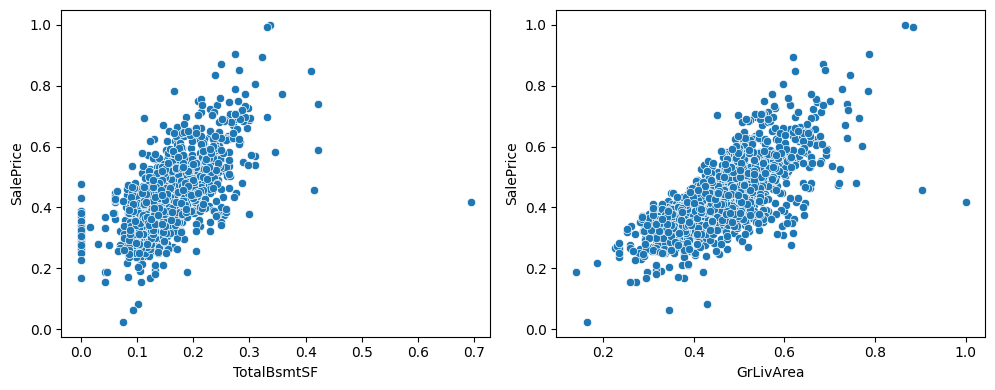

In [37]:
plt.figure(figsize=(15, 4))
for i, column in enumerate(outliers, 1):
  if column != 'SalePrice':
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df_scaled, x=column, y='SalePrice')
plt.tight_layout()
plt.show()

Visually looking and handling outliers from the scatterplot

In [38]:
df_scaled.query('TotalBsmtSF > 0.50')

,OverallQual,YearBuilt,ExterQual,BsmtQual,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,GarageCars,SalePrice,GarageFinish_Unf
1298,1.0,0.985507,0.693147,1.0,0.693147,1.0,0.666667,1.0,0.5,0.416804,0.0


In [39]:
df_scaled = df_scaled.drop([1298], axis=0)

In [40]:
df_scaled.query('GrLivArea > 0.85')

,OverallQual,YearBuilt,ExterQual,BsmtQual,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,GarageCars,SalePrice,GarageFinish_Unf
523,1.0,0.978261,0.693147,1.0,0.414481,0.904439,1.0,1.0,0.75,0.456176,0.0
691,1.0,0.884058,0.693147,1.0,0.336472,0.866134,1.0,1.0,0.75,1.000000,0.0
1182,1.0,0.898551,0.510826,1.0,0.330845,0.883364,1.0,1.0,0.75,0.993032,0.0


In [41]:
df_scaled = df_scaled.drop([523, 691, 1182], axis=0)

Let's plot the scatterplot against SalePrice for the remaning features

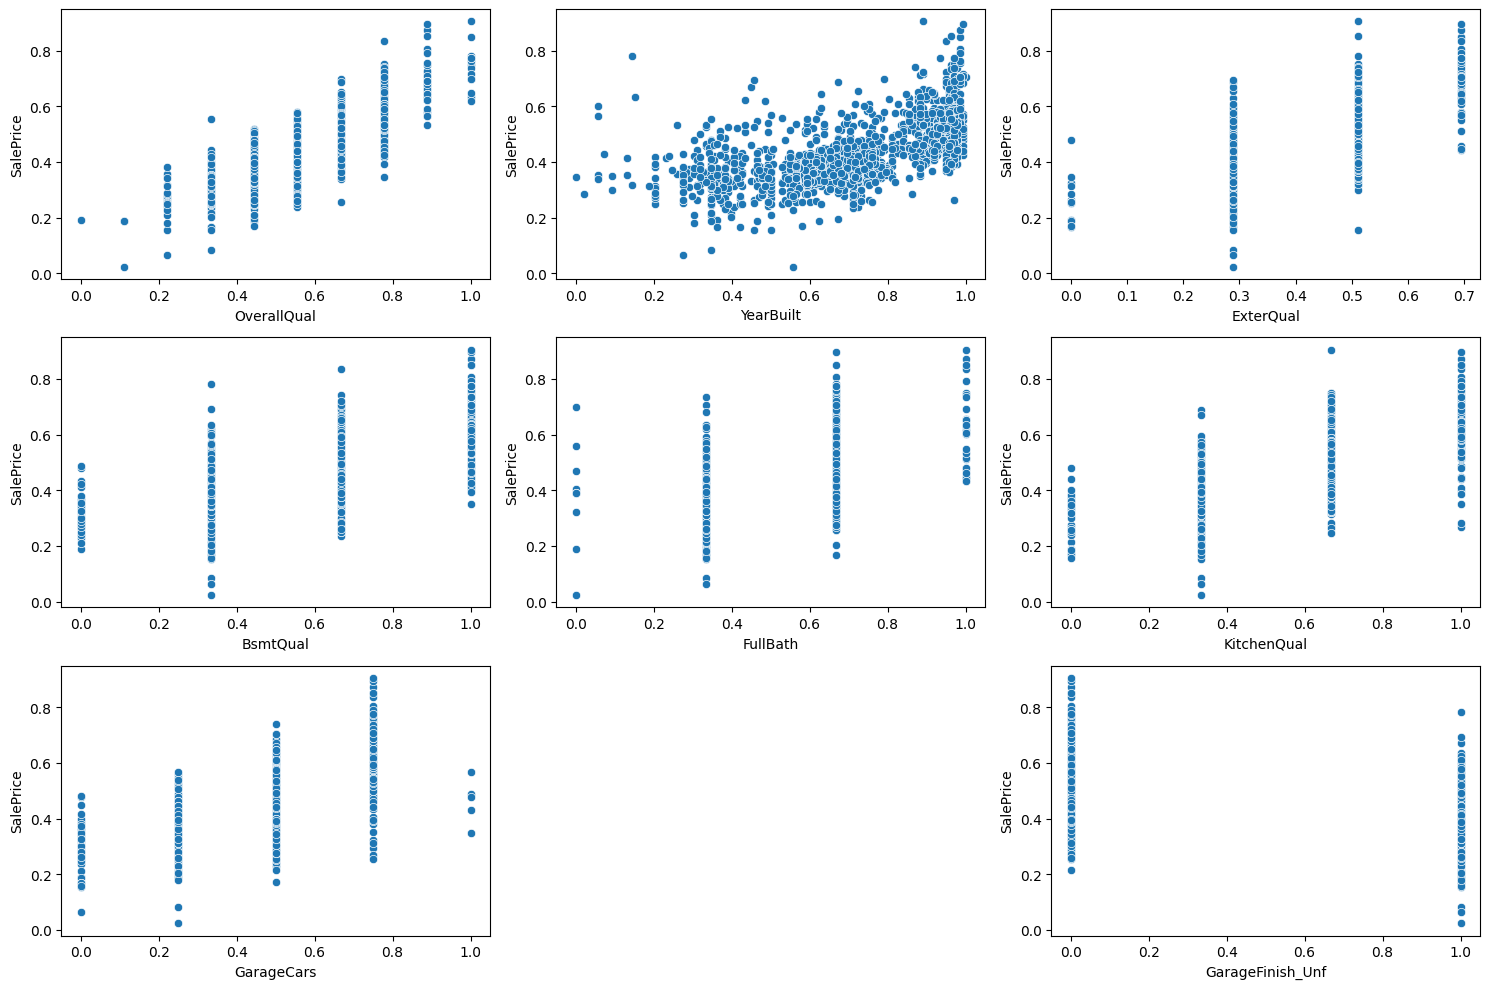

In [42]:
outlier_features = ['OverallQual', 'YearBuilt', 'ExterQual', 'BsmtQual', 'FullBath',	'KitchenQual',	'GarageCars',	'SalePrice', 'GarageFinish_Unf']

plt.figure(figsize=(15, 10))
for i, column in enumerate(outlier_features, 1):
  if column != 'SalePrice':
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df_scaled, x=column, y='SalePrice')
plt.tight_layout()
plt.show()

Visually looking and handling outliers from the scatterplot

In [43]:
df_scaled.query('OverallQual < 0.1 & SalePrice < 0.2')

,OverallQual,YearBuilt,ExterQual,BsmtQual,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,GarageCars,SalePrice,GarageFinish_Unf
375,0.0,0.362319,0.0,0.0,0.105966,0.327697,0.0,0.0,0.0,0.190381,1.0


In [44]:
df_scaled = df_scaled.drop([375], axis=0)

In [45]:
df_scaled.query('0.4 < ExterQual < 0.6 & SalePrice < 0.2')

,OverallQual,YearBuilt,ExterQual,BsmtQual,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,GarageCars,SalePrice,GarageFinish_Unf
710,0.222222,0.456522,0.510826,0.333333,0.043241,0.272793,0.333333,0.333333,0.0,0.1541,1.0


In [46]:
df_scaled = df_scaled.drop([710], axis=0)

In [47]:
df_scaled.query('0.6 < KitchenQual < 0.8 & SalePrice > 0.8')

,OverallQual,YearBuilt,ExterQual,BsmtQual,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,GarageCars,SalePrice,GarageFinish_Unf
1169,1.0,0.891304,0.510826,1.0,0.274502,0.787645,1.0,0.666667,0.75,0.905246,0.0


In [48]:
df_scaled = df_scaled.drop([1169], axis=0)

Calculating Z-Score for unseen outliers/anomalies

In [49]:
df_scaled['SalePrice_zscore'] = zscore(df_scaled['SalePrice'])
outliers = df_scaled[df_scaled['SalePrice_zscore'].abs() > 3]
print(outliers)

      OverallQual  YearBuilt  ExterQual  BsmtQual  TotalBsmtSF  GrLivArea  \
30       0.333333   0.347826   0.287682  0.333333     0.100948   0.430340   
178      0.888889   0.985507   0.693147  1.000000     0.309456   0.598289   
185      1.000000   0.144928   0.510826  0.333333     0.166513   0.785369   
440      1.000000   0.985507   0.693147  1.000000     0.409711   0.624180   
769      0.777778   0.949275   0.693147  0.666667     0.239056   0.744864   
798      0.888889   0.985507   0.693147  1.000000     0.274005   0.727074   
803      0.888889   0.985507   0.693147  1.000000     0.249822   0.684636   
898      0.888889   0.992754   0.693147  1.000000     0.323056   0.618419   
916      0.111111   0.557971   0.287682  0.333333     0.075627   0.165848   
968      0.222222   0.275362   0.287682  0.333333     0.093672   0.345604   
1046     0.888889   0.963768   0.510826  1.000000     0.282184   0.690936   
1243     1.000000   0.971014   0.693147  1.000000     0.292499   0.572873   

Dropping rows with  Z-score > 3

In [50]:
df_scaled = df_scaled.drop([30, 178, 185, 440, 769, 803, 898, 916, 1046, 1243, 1373], axis=0)

We removed about 1.3% of rows from the inital dataset as part of the data cleanup process

In [51]:
data_before = len(df)
df_now = len(df_scaled)

removed_outliers = data_before - df_now
outliers_removed_perc = (removed_outliers / data_before)*100
print(outliers_removed_perc)

1.36986301369863


Dropping SalePrice_zscore feature

In [52]:
df_scaled = df_scaled.drop('SalePrice_zscore', axis=1)

Checking for skewness after removing outliers

In [53]:
outliers = ['TotalBsmtSF', 'GrLivArea', 'SalePrice']
for column in outliers:
  skew_score = df_scaled[column].skew()
  print("Skew: ", column, skew_score)

Skew:  TotalBsmtSF 0.11219890273834332
Skew:  GrLivArea 0.2044176744681431
Skew:  SalePrice 0.48938741608838615


Plotting histogram for visualization

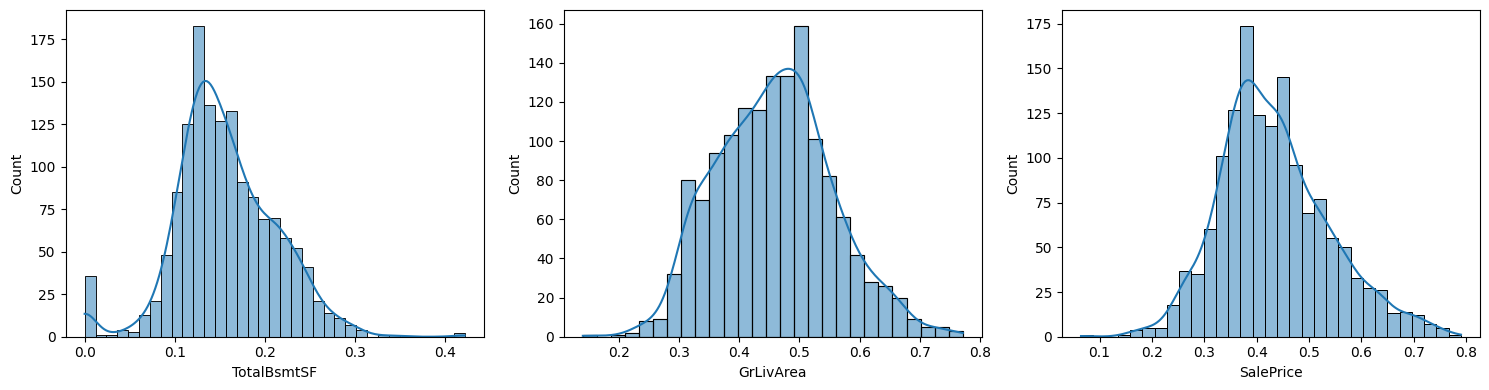

In [54]:
outliers = ['TotalBsmtSF', 'GrLivArea', 'SalePrice']
plt.figure(figsize=(15, 4))
for i, column in enumerate(outliers, 1):
  plt.subplot(1, 3, i)
  sns.histplot(df_scaled[column], kde=True)
plt.tight_layout()
plt.show()

# Feature Engineering

2.1 Creating Interaction Features: Create meaningful interaction features that may help improve model performance.

In [55]:
df_scaled.head()

,OverallQual,YearBuilt,ExterQual,BsmtQual,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,GarageCars,SalePrice,GarageFinish_Unf
0,0.666667,0.949275,0.510826,0.666667,0.131114,0.509148,0.666667,0.666667,0.50,0.490997,0.0
1,0.555556,0.753623,0.287682,0.666667,0.187762,0.418127,0.666667,0.333333,0.50,0.451202,0.0
2,0.666667,0.934783,0.510826,0.666667,0.140260,0.523019,0.666667,0.666667,0.50,0.511770,0.0
3,0.666667,0.311594,0.287682,0.333333,0.116655,0.510441,0.333333,0.666667,0.75,0.382037,1.0
4,0.777778,0.927536,0.510826,0.666667,0.171764,0.592594,0.666667,0.666667,0.75,0.546542,0.0


In [56]:
df_scaled.corr()

,OverallQual,YearBuilt,ExterQual,BsmtQual,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,GarageCars,SalePrice,GarageFinish_Unf
OverallQual,1.000000,0.574619,0.712591,0.656008,0.505755,0.577792,0.529340,0.654748,0.581706,0.812472,-0.536133
YearBuilt,0.574619,1.000000,0.603307,0.721857,0.389008,0.209773,0.461846,0.527226,0.532803,0.583726,-0.617002
ExterQual,0.712591,0.603307,1.000000,0.631661,0.431003,0.411308,0.469462,0.700752,0.511974,0.683409,-0.512788
BsmtQual,0.656008,0.721857,0.631661,1.000000,0.434778,0.357486,0.474737,0.557869,0.512474,0.661379,-0.530876
TotalBsmtSF,0.505755,0.389008,0.431003,0.434778,1.000000,0.377729,0.295221,0.400571,0.425674,0.627014,-0.372892
GrLivArea,0.577792,0.209773,0.411308,0.357486,0.377729,1.000000,0.638120,0.392376,0.470318,0.718994,-0.337764
FullBath,0.529340,0.461846,0.469462,0.474737,0.295221,0.638120,1.000000,0.412930,0.451642,0.573649,-0.427293
KitchenQual,0.654748,0.527226,0.700752,0.557869,0.400571,0.392376,0.412930,1.000000,0.490373,0.663603,-0.452686
GarageCars,0.581706,0.532803,0.511974,0.512474,0.425674,0.470318,0.451642,0.490373,1.000000,0.667218,-0.474547
SalePrice,0.812472,0.583726,0.683409,0.661379,0.627014,0.718994,0.573649,0.663603,0.667218,1.000000,-0.570773


Creating a new feature called Total area in square feet by combining Living area in Sq feet above ground + Total basement area in square feet

In [57]:
df_scaled['TotalAreaSF'] = df_scaled['GrLivArea'] + df_scaled['TotalBsmtSF']

In [58]:
df_scaled['TotalAreaSF'].head()

,TotalAreaSF
0,0.640262
1,0.605890
2,0.663279
3,0.627096
4,0.764358


Check new feature's correlation with SalePrice

In [59]:
df_scaled['TotalAreaSF'].corr(df_scaled['SalePrice'])

np.float64(0.8127314645804228)

*New feature is highly correlated with the dependent variable*

Combine quality features together

In [60]:
df_scaled['HouseQuality'] = (df_scaled['OverallQual'] + df_scaled['ExterQual'] + df_scaled['BsmtQual'] + df_scaled['KitchenQual'])/4

In [61]:
df_scaled['HouseQuality'].head()

,HouseQuality
0,0.627706
1,0.460809
2,0.627706
3,0.488587
4,0.655484


In [62]:
df_scaled['HouseQuality'].corr(df_scaled['SalePrice'])

np.float64(0.8136737884265193)

Combine SalePrice and TotalAreaSF to calculate price per square feet

In [63]:
df_scaled['PricePerSF'] = df_scaled['SalePrice']/df_scaled['TotalAreaSF']

In [64]:
df_scaled['PricePerSF'].head()

,PricePerSF
0,0.766868
1,0.744693
2,0.771575
3,0.609215
4,0.715034


In [65]:
df_scaled['PricePerSF'].corr(df_scaled['SalePrice'])

np.float64(0.46106701911201614)

Dropping old features after creating new features

In [66]:
df_scaled = df_scaled.drop(['OverallQual', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', 'GrLivArea', 'KitchenQual'], axis=1)

Final columns and data

In [67]:
df_scaled.head(10)

,YearBuilt,FullBath,GarageCars,SalePrice,GarageFinish_Unf,TotalAreaSF,HouseQuality,PricePerSF
0,0.949275,0.666667,0.50,0.490997,0.0,0.640262,0.627706,0.766868
1,0.753623,0.666667,0.50,0.451202,0.0,0.605890,0.460809,0.744693
2,0.934783,0.666667,0.50,0.511770,0.0,0.663279,0.627706,0.771575
3,0.311594,0.333333,0.75,0.382037,1.0,0.627096,0.488587,0.609215
4,0.927536,0.666667,0.75,0.546542,0.0,0.764358,0.655484,0.715034
5,0.876812,0.333333,0.50,0.387451,1.0,0.562543,0.433032,0.688748
6,0.956522,0.666667,0.50,0.614707,0.0,0.749863,0.738818,0.819759
7,0.731884,0.666667,0.50,0.478825,0.0,0.741683,0.488587,0.645593
8,0.427536,0.666667,0.50,0.363216,1.0,0.665655,0.405254,0.545652
9,0.485507,0.333333,0.25,0.339707,0.0,0.524444,0.349698,0.647746


In [68]:
df_scaled.corr()

,YearBuilt,FullBath,GarageCars,SalePrice,GarageFinish_Unf,TotalAreaSF,HouseQuality,PricePerSF
YearBuilt,1.000000,0.461846,0.532803,0.583726,-0.617002,0.326844,0.713382,0.488086
FullBath,0.461846,1.000000,0.451642,0.573649,-0.427293,0.607560,0.544143,0.071547
GarageCars,0.532803,0.451642,1.000000,0.667218,-0.474547,0.538393,0.606845,0.320843
SalePrice,0.583726,0.573649,0.667218,1.000000,-0.570773,0.812731,0.813674,0.461067
GarageFinish_Unf,-0.617002,-0.427293,-0.474547,-0.570773,1.000000,-0.415907,-0.589270,-0.335062
TotalAreaSF,0.326844,0.607560,0.538393,0.812731,-0.415907,1.000000,0.593498,-0.123328
HouseQuality,0.713382,0.544143,0.606845,0.813674,-0.589270,0.593498,1.000000,0.461049
PricePerSF,0.488086,0.071547,0.320843,0.461067,-0.335062,-0.123328,0.461049,1.000000


**2.2 Feature Binning: Bin continuous variables into discrete categories for better interpretability.**

Let's bin 'FullBath', 'GarageCars', 'SalePrice', 'TotalAreaSF', 'HouseQuality', 'PricePerSF' into 3 same categories:


1.   Affordable
2.   Mid range
3.   Luxury



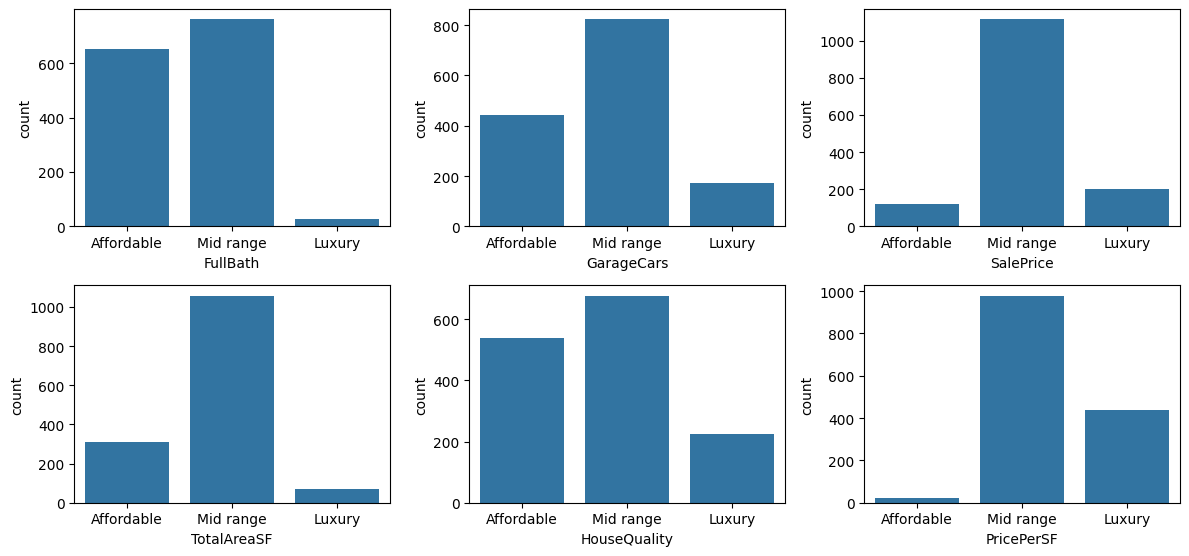

In [69]:
continuous_num_features = ['FullBath', 'GarageCars', 'SalePrice', 'TotalAreaSF', 'HouseQuality', 'PricePerSF']
df_scaled_bin = df_scaled.copy()
plt.figure(figsize=(12, 8))
for i, column in enumerate(continuous_num_features, 1):
  df_scaled_bin[column] = pd.cut(df_scaled_bin[column], bins=3, labels=['Affordable', 'Mid range', 'Luxury'])
  plt.subplot(3, 3, i)
  sns.countplot(data=df_scaled_bin, x=column)
plt.tight_layout()
plt.show()

In [70]:
df_scaled_bin.head()

,YearBuilt,FullBath,GarageCars,SalePrice,GarageFinish_Unf,TotalAreaSF,HouseQuality,PricePerSF
0,0.949275,Mid range,Mid range,Mid range,0.0,Mid range,Mid range,Luxury
1,0.753623,Mid range,Mid range,Mid range,0.0,Mid range,Mid range,Mid range
2,0.934783,Mid range,Mid range,Mid range,0.0,Mid range,Mid range,Luxury
3,0.311594,Affordable,Luxury,Mid range,1.0,Mid range,Mid range,Mid range
4,0.927536,Mid range,Luxury,Mid range,0.0,Mid range,Luxury,Mid range


In [71]:
df_scaled.head()

,YearBuilt,FullBath,GarageCars,SalePrice,GarageFinish_Unf,TotalAreaSF,HouseQuality,PricePerSF
0,0.949275,0.666667,0.50,0.490997,0.0,0.640262,0.627706,0.766868
1,0.753623,0.666667,0.50,0.451202,0.0,0.605890,0.460809,0.744693
2,0.934783,0.666667,0.50,0.511770,0.0,0.663279,0.627706,0.771575
3,0.311594,0.333333,0.75,0.382037,1.0,0.627096,0.488587,0.609215
4,0.927536,0.666667,0.75,0.546542,0.0,0.764358,0.655484,0.715034


In [72]:
df_scaled['SalePrice'].skew()

np.float64(0.48938741608838615)

# Task 3: Exploratory Data Analysis (EDA)

What is the distribution of sale prices?

*Distribution is SalePrice in the initial dataset was right skewed. But after performing all the above transformations, distribution for SalePrice is now a normal distribution. By looking at the distribution we can say that the availability of mid range houses is more than low value or expensive houses*

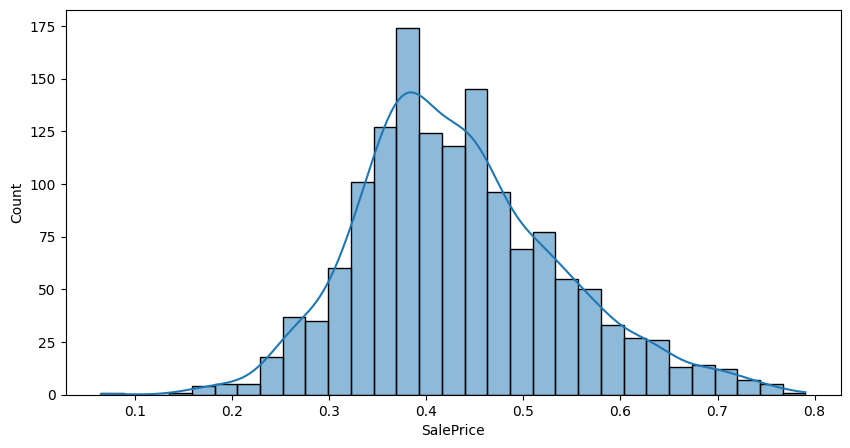

In [73]:
plt.figure(figsize=(10, 5))
sns.histplot(df_scaled['SalePrice'], kde=True)
plt.show()

How do different features relate to sale price?

*As we saw above, we have selected some features which have very high correlation with Sale Price.*

All the features now have positive correlation except for **GarageFinish_Unf** which has negative correlation. This negative correlation is because SalePrice of houses will be lower for whose Garages are unfinished.

Features such as **OverallQual** and **GrLivArea** are highly correlated and also forms a linear pattern with SalePrice on the scatterplot. These two features highly impact the house price as Higher carpert area and higher quality will also increase the house price. We used these two features to create new features which are also strongly correlated with SalePrice.

Feature **HouseQuality** and **TotalAreaSF** which is are the features that were engineered by combining several house quality  features also has a strong correlation with the SalePrice. Higher quality and more area will lead to higher house prices.

**Yearbuilt** feature also has good correlation with SalePrice. New houses would be more expensive compared to the old ones.

**FullBath** and **GarageCars** also have positive correlation with SalePrice. Higher the number of Bathrooms and car space in Garage will result in property price.

 **PricePerSF** also have positive correlation with SalePrice but not as strong as TotalAreaSF. It is possible because as the prices of houses go up then more area is provided for the price value considering their low demand compared to affordable and mid range houses.

Identify trends and patterns in the data.

Key trends and patters were:


1.   Higher area in square feet means higher prices
2.   Higher quality means higher prices which can be observed by looking at all the quality related features.
3.   Additional facilities such as availability of more FullBath and Garage space will make the house expensive.
4.   New homes will be more expensive compared to the older ones.



# Task 4: Model Building and Evaluation

Initialize X and y

In [74]:
X = df_scaled.drop('SalePrice', axis=1)
y = df_scaled['SalePrice']

Split training and test data

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [76]:
print("Traning data rows: ", len(X_train))
print("Testing data rows: ", len(X_test))

Traning data rows:  1152
Testing data rows:  288


**XGB Model**

In [77]:
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, subsample=0.75, colsample_bytree=1, max_depth=7)

In [78]:
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [79]:
xgb_y_test_pred =xgb_model.predict(X_test)
xgb_y_train_pred =xgb_model.predict(X_train)

**XGB Model Evaluation**

In [80]:
print("RMSE score for test data is: ", root_mean_squared_error(y_test, xgb_y_test_pred))
print("Mean absolute error for test data is: ", mean_absolute_error(y_test, xgb_y_test_pred))
print("R-squared score for test data is: ", r2_score(y_test, xgb_y_test_pred))

RMSE score for test data is:  0.008550213160878973
Mean absolute error for test data is:  0.004868671661362092
R-squared score for test data is:  0.9930418769349846


In [81]:
print("RMSE score for train data is: ", root_mean_squared_error(y_train, xgb_y_train_pred))
print("Mean absolute error for train data is: ", mean_absolute_error(y_train, xgb_y_train_pred))
print("R-squared score for train data is: ", r2_score(y_train, xgb_y_train_pred))

RMSE score for train data is:  0.0019870115308520822
Mean absolute error for train data is:  0.0015371248852263006
R-squared score for train data is:  0.9996458563391348


**LGBM Model**

In [82]:
lgbm_model = lgbm.LGBMRegressor(n_estimators=100, learning_rate=0.1)

In [83]:
lgbm_model.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 1152, number of used features: 7
[LightGBM] [Info] Start training from score 0.433678


LGBMRegressor()

In [84]:
lgbm_y_test_pred = lgbm_model.predict(X_test)
lgbm_y_train_pred = lgbm_model.predict(X_train)

**LGBM Evaluation**

In [85]:
print("RMSE score for test data is: ", root_mean_squared_error(y_test, lgbm_y_test_pred))
print("Mean absolute error for test data is: ", mean_absolute_error(y_test, lgbm_y_test_pred))
print("R-squared score for test data is: ", r2_score(y_test, lgbm_y_test_pred))

RMSE score for test data is:  0.009633261860475991
Mean absolute error for test data is:  0.005698110742506375
R-squared score for test data is:  0.991167473415195


In [86]:
print("RMSE score for train data is: ", root_mean_squared_error(y_train, lgbm_y_train_pred))
print("Mean absolute error for train data is: ", mean_absolute_error(y_train, lgbm_y_train_pred))
print("R-squared score for train data is: ", r2_score(y_train, lgbm_y_train_pred))

RMSE score for train data is:  0.007689610779043703
Mean absolute error for train data is:  0.003494803219313145
R-squared score for train data is:  0.9946961966482252


**CatBoost Model**

In [87]:
catboost_model = CatBoostRegressor(iterations=500, depth=7, learning_rate=0.1, loss_function='RMSE', verbose = 0, cat_features=[])

In [88]:
catboost_model.fit(X_train, y_train)

In [89]:
cb_y_train_pred = catboost_model.predict(X_train)
cb_y_test_pred = catboost_model.predict(X_test)

**CatBoost Evaluation**

In [90]:
print("RMSE score for test data is: ", root_mean_squared_error(y_test, lgbm_y_test_pred))
print("Mean absolute error for test data is: ", mean_absolute_error(y_test, lgbm_y_test_pred))
print("R-squared score for test data is: ", r2_score(y_test, lgbm_y_test_pred))

RMSE score for test data is:  0.009633261860475991
Mean absolute error for test data is:  0.005698110742506375
R-squared score for test data is:  0.991167473415195


In [91]:
print("RMSE score for train data is: ", root_mean_squared_error(y_train, lgbm_y_train_pred))
print("Mean absolute error for train data is: ", mean_absolute_error(y_train, lgbm_y_train_pred))
print("R-squared score for train data is: ", r2_score(y_train, lgbm_y_train_pred))

RMSE score for train data is:  0.007689610779043703
Mean absolute error for train data is:  0.003494803219313145
R-squared score for train data is:  0.9946961966482252
